In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import copy

np.random.seed(42)

def data_transform(x):
    idx = x.find(":")
    return x[idx+1:]

df = pd.read_csv("housing_scale.txt",header=None, sep=' ')
y = df.iloc[:,0]
df.dropna(inplace=True,axis=1)
X = df.iloc[:,1:].applymap(data_transform)
X["incept"]=1
X = X.astype("float")
y = y.astype("float")
X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Text(0.5, 1.0, 'Momentum SGD')

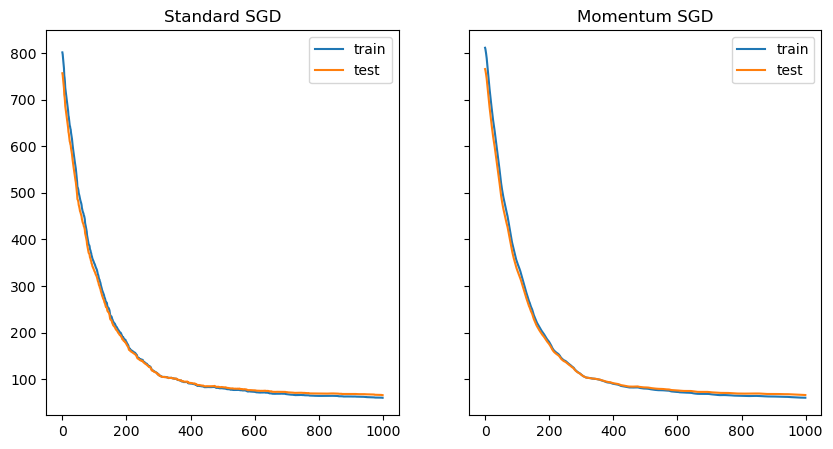

In [2]:
A_SGD = np.random.randn(X.shape[1])
A_MSGD = copy.deepcopy(A_SGD)


epoches = 1000
train_losses_SGD = []
test_losses_SGD = []
train_losses_MSGD = []
test_losses_MSGD = []
gamma = 0.0002                           # 设置学习率
beta = 0.8
previous_A = copy.deepcopy(A_SGD)
for i in range(epoches):
    rand_index = np.random.randint(0,len(X_train))
    rand_x = X_train[rand_index]
    rand_y = y_train[rand_index]
    #forward 前驱函数
    pred_y_SGD = np.dot(A_SGD,rand_x)
    pred_y_MSGD = np.dot(A_MSGD,rand_x)

    grad_SGD = (pred_y_SGD - rand_y)*rand_x
    grad_MSGD = (pred_y_MSGD - rand_y)*rand_x

    A_SGD = A_SGD - gamma/(1-beta) * grad_SGD
    A_MSGD_ = copy.deepcopy(A_MSGD)
    A_MSGD = A_MSGD - gamma * grad_MSGD + beta * (A_MSGD - previous_A)
    previous_A = copy.deepcopy(A_MSGD_)


    pred_train_y_SGD = np.matmul(X_train, A_SGD)
    pred_test_y_SGD = np.matmul(X_test, A_SGD)
    pred_train_y_MSGD = np.matmul(X_train, A_MSGD)
    pred_test_y_MSGD = np.matmul(X_test, A_MSGD)

    train_losses_SGD.append(MSE(pred_train_y_SGD, y_train))
    test_losses_SGD.append(MSE(pred_test_y_SGD, y_test))
    train_losses_MSGD.append(MSE(pred_train_y_MSGD, y_train))
    test_losses_MSGD.append(MSE(pred_test_y_MSGD, y_test))

fig, axes = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
axes[0].plot(train_losses_SGD, label="train")
axes[0].plot(test_losses_SGD, label="test")
axes[0].legend()
axes[0].set_title("Standard SGD")

axes[1].plot(train_losses_MSGD, label="train")
axes[1].plot(test_losses_MSGD, label="test")
axes[1].legend()
axes[1].set_title("Momentum SGD")

# print("final A={0}".format(A))

In [3]:
train_losses_MSGD==train_losses_SGD

False

Text(0.5, 1.0, 'Test MSE')

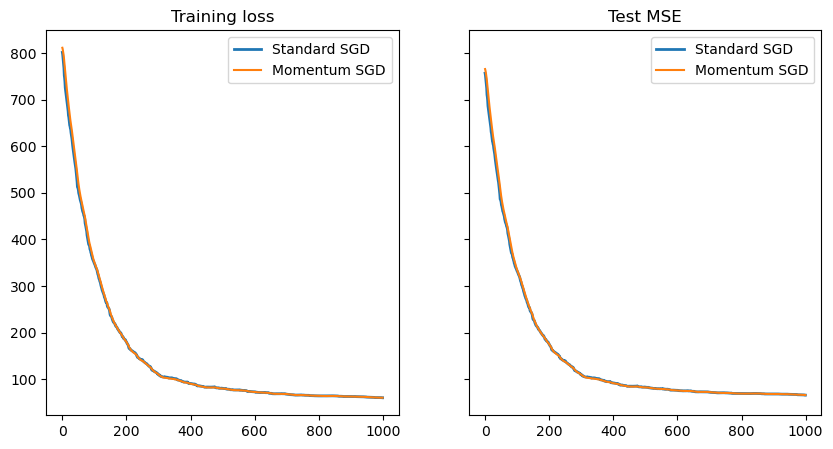

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
axes[0].plot(train_losses_SGD, label="Standard SGD", linewidth=2)
axes[0].plot(train_losses_MSGD, label="Momentum SGD")
axes[0].legend()
axes[0].set_title("Training loss")

axes[1].plot(test_losses_SGD, label="Standard SGD", linewidth=2)
axes[1].plot(test_losses_MSGD, label="Momentum SGD")
axes[1].legend()
axes[1].set_title("Test MSE")

In [5]:
test_losses_SGD==test_losses_MSGD

False